In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [102]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    df1 = oecd_bli.loc[(oecd_bli['Indicator']=='Life satisfaction') & (oecd_bli['Inequality']=='Total'), ['Country', 'Value']]
    df2 = gdp_per_capita[['Country','2015']]
    country_stats = pd.merge(df1, df2, on='Country', how='inner')
    country_stats.rename(columns={"Value": "Life satisfaction", "2015": "GDP per capita"},  inplace=True)
    country_stats.sort_values(by="GDP per capita",  inplace=True)
    print (country_stats)

    country_stats.set_index('Country', inplace=True)
    # The code in the book removes certain countries from the data as they are not representitive of the data trend.
    #[ Colombia, Brazil, Mexico, Greece, Portugal, Chile, Czech Republic, Luxembourg, United States]
    remove_indices = [38, 30, 17, 9, 22, 31, 4, 16, 29]
    keep_indices = list(set(range(39)) - set(remove_indices))
    subset_country_stats=country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    return subset_country_stats

In [103]:
#Load the data

# Before running this code, export data in .csv format to your system from:
# https://stats.oecd.org/index.aspx?DataSetCode=BLI 
oecd_bli = pd.read_csv("BLI_21032020193554577.csv", thousands=',')

# Before running this code, download data in .xls format to your system from: 
# https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C962%2C213%2C674%2C911%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C142%2C156%2C449%2C626%2C564%2C628%2C565%2C228%2C283%2C924%2C853%2C233%2C288%2C632%2C293%2C636%2C566%2C634%2C964%2C238%2C182%2C662%2C453%2C960%2C968%2C423%2C922%2C935%2C714%2C128%2C862%2C611%2C135%2C321%2C716%2C243%2C456%2C248%2C722%2C469%2C942%2C253%2C718%2C642%2C724%2C643%2C576%2C939%2C936%2C644%2C961%2C819%2C813%2C172%2C199%2C132%2C733%2C646%2C184%2C648%2C524%2C915%2C361%2C134%2C362%2C652%2C364%2C174%2C732%2C328%2C366%2C258%2C734%2C656%2C144%2C654%2C146%2C336%2C463%2C263%2C528%2C268%2C923%2C532%2C738%2C944%2C578%2C176%2C537%2C534%2C742%2C536%2C866%2C429%2C369%2C433%2C744%2C178%2C186%2C436%2C925%2C136%2C869%2C343%2C746%2C158%2C926%2C439%2C466%2C916%2C112%2C664%2C111%2C826%2C298%2C542%2C927%2C967%2C846%2C443%2C299%2C917%2C582%2C544%2C474%2C941%2C754%2C446%2C698%2C666&s=NGDPDPC&grp=0&a=
gdp_per_capita = pd.read_csv("WEO_Data.xls", thousands=',', delimiter='\t',
                            encoding='latin1', na_values="n/a")

# As you have downloaded fresh data, your results will vary from the book

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]


            Country  Life satisfaction  GDP per capita
37     South Africa                4.7        5694.572
38         Colombia                6.3        6083.510
30           Brazil                6.4        8669.998
17           Mexico                6.5        9009.280
35           Russia                5.8        9054.914
27           Turkey                5.5        9437.372
10          Hungary                5.6       12239.894
21           Poland                6.1       12495.334
31            Chile                6.5       13340.905
34           Latvia                5.9       13618.569
39        Lithuania                5.9       14210.280
23  Slovak Republic                6.2       15991.736
4    Czech Republic                6.7       17256.918
32          Estonia                5.7       17288.083
9            Greece                5.4       18064.288
22         Portugal                5.4       19121.592
36         Slovenia                5.9       20732.482
24        

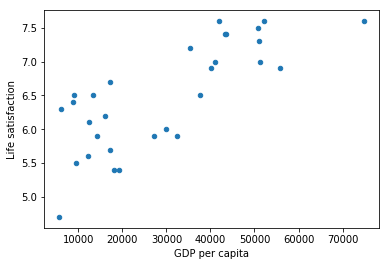

In [104]:
# plot the data
country_stats.plot(kind='scatter', x="GDP per capita",y="Life satisfaction")
plt.show()

[[6.25408355]]


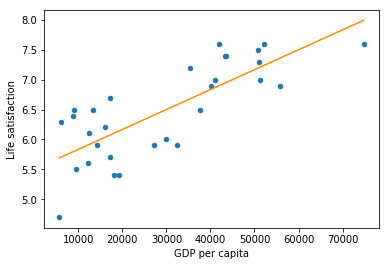

In [105]:
model = sklearn.linear_model.LinearRegression()
# train the model
model.fit(x,y)
#make prediction on the model
x_new = [[22587]]
print(model.predict(x_new))

#plot the learned model
t0, t1 = model.intercept_[0], model.coef_[0][0]
country_stats.plot(kind='scatter', x="GDP per capita",y="Life satisfaction")
plt.plot(x, t0 + t1*x, "b", color='darkorange')
plt.show()

[[5.56666667]]


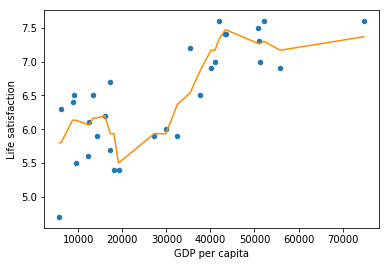

In [110]:
# using k-nearest neigbour instead of linear regression model

n_neighbors=3 # change the number of n_neighbors and see how the model varies
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors)
# train the model
model.fit(x,y)
#make prediction on the model
x_new = [[22587]]
print(model.predict(x_new))

#plot the learned model
y_predicted = model.predict(x)
country_stats.plot(kind='scatter', x="GDP per capita",y="Life satisfaction")
plt.plot(x, y_predicted, "b", color='darkorange')
plt.show()